In [1]:
import glob
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram

from sklearn import metrics 
import IPython.display as ipd
from keras.utils import np_utils
from keras.utils import to_categorical

from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv(r'D:\Datasets\Urban\Train\Train.csv')
df.dropna

<bound method DataFrame.dropna of         ID             Class
0        0             siren
1        1      street_music
2        2          drilling
3        3             siren
4        4          dog_bark
5        6  children_playing
6       10      street_music
7       11          drilling
8       12          gun_shot
9       15          dog_bark
10      17     engine_idling
11      18             siren
12      19          gun_shot
13      20     engine_idling
14      22   air_conditioner
15      24   air_conditioner
16      26     engine_idling
17      27             siren
18      32  children_playing
19      33        jackhammer
20      35          gun_shot
21      36             siren
22      37        jackhammer
23      38      street_music
24      40        jackhammer
25      42     engine_idling
26      43             siren
27      44  children_playing
28      45        jackhammer
29      46     engine_idling
...    ...               ...
5405  8691      street_music
5406  869

Class:  engine_idling
Sampling Rate:  22050 Hz
Duration:  4.0
Number of samples:  88200


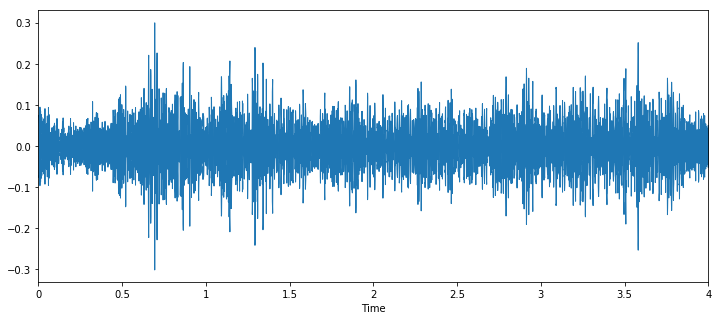

In [3]:
import librosa.display

y, sr = librosa.load('D:/Datasets/Urban/train/Train/540.wav')
plt.figure(figsize=(12,5))
librosa.display.waveplot(y,sr);
print('Class: ', df.Class[540])
print('Sampling Rate: ',sr,'Hz')
print('Duration: ',len(y)/sr)
print('Number of samples: ', len(y))
ipd.Audio(data=y, rate=sr)

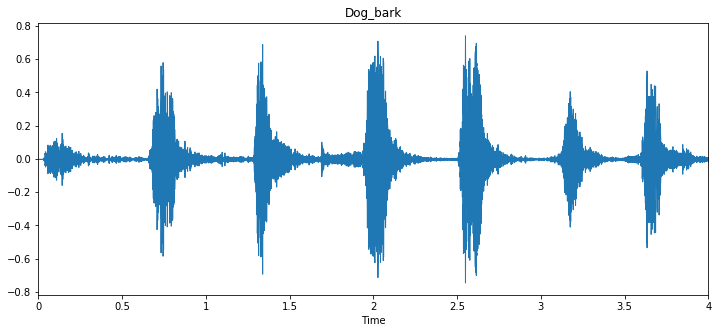

In [4]:
y, sr = librosa.load('D:/Datasets/Urban/train/Train/68.wav')
plt.figure(figsize=(12,5))
librosa.display.waveplot(y,sr);
plt.title('Dog_bark')
ipd.Audio(data=y, rate=sr)

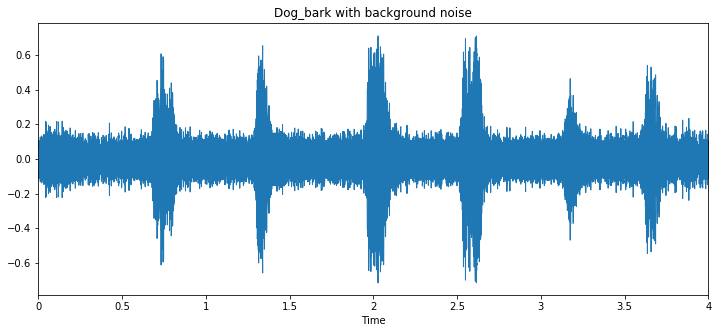

In [5]:
plt.figure(figsize=(12,5))
noise = np.random.randn(len(y))
data_noise = y + 0.05 * noise
librosa.display.waveplot(data_noise,sr);
plt.title('Dog_bark with background noise')
ipd.Audio(data=data_noise, rate=sr)

In [6]:
##PArt 2

In [7]:
##Now let us see how we can leverage the concepts we learned above to solve the problem. We will follow these steps to solve the problem.

#Step 1: Load audio files
#Step 2: Extract features from audio
#Step 3: Convert the data to pass it in our deep learning model
#Step 4: Run a deep learning model and get results

In [8]:
D = []
for filename in  glob.glob(r'D:\Datasets\Urban\train\Train\*.wav' , recursive=True):
    D.append(filename)

In [9]:
features, labels = np.empty((0,193)), np.empty(0)
for file_name in range(len(D)):
    try:
        
        X, sample_rate = librosa.load(D[file_name])
        stft = np.abs(librosa.stft(X))
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),sr=sample_rate).T,axis=0)
    except Exception as e:
        print ("Error encountered while parsing file: ", D[file_name])
        continue
    ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
    features = np.vstack([features,ext_features])
    labels = np.append(labels,int(D[file_name].split('\\')[-1].split('.')[0]))


Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1003.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\101.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1017.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1021.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1024.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1030.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1034.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1036.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1038.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1040.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\105.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1061.wav


C:\ProgramData\Anaconda3\lib\site-packages\librosa\core\pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1079.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1082.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1085.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1091.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1098.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1118.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\113.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1134.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1137.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1139.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\114.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1143.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Tra

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1561.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1565.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1570.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1573.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1586.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1588.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1591.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1597.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1601.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1607.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1608.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1612.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\T

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\1999.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2000.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2013.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2018.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2023.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2025.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2026.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2031.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2047.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2049.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2051.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2066.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\T

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2480.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2494.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2499.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2501.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2503.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2506.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2507.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\251.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2510.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2511.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2515.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2516.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Tr

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\295.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2954.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2955.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2959.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2960.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2961.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2962.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2966.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2969.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2971.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2972.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\2974.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Tr

C:\ProgramData\Anaconda3\lib\site-packages\librosa\util\utils.py:1467: RuntimeWarning: invalid value encountered in less
  if np.any(X < 0) or np.any(X_ref < 0):
C:\ProgramData\Anaconda3\lib\site-packages\librosa\util\utils.py:1479: RuntimeWarning: invalid value encountered in maximum
  Z = np.maximum(X, X_ref).astype(dtype)
C:\ProgramData\Anaconda3\lib\site-packages\librosa\util\utils.py:1480: RuntimeWarning: invalid value encountered in less
  bad_idx = (Z < np.finfo(dtype).tiny)


Error encountered while parsing file:  D:\Datasets\Urban\train\Train\300.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3003.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3008.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\301.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3011.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3020.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3024.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3026.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3036.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3038.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3046.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\305.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Trai

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3478.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3480.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3481.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3483.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3486.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3495.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\35.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3501.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3508.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3510.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3514.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3515.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Tra

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3884.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3888.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3891.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3895.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3896.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3898.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3900.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3909.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3916.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3918.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3919.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\3920.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\T

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4374.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4379.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\438.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4381.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4392.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4393.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4394.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4400.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4406.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4412.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4425.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4428.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Tr

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4840.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4842.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4843.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4844.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4852.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4853.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4858.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\486.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4860.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4866.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4867.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\4873.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Tr

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\528.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5289.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5294.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5302.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5304.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5307.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5313.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5315.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5316.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5323.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5331.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5333.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Tr

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5796.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5799.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5808.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5813.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5816.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5840.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5841.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5847.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\585.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5850.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5856.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\5857.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Tr

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6262.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6263.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6270.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6283.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6288.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6295.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6296.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\630.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6300.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6304.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6309.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\631.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Tra

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6749.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6755.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6760.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6763.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6764.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6768.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6773.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6775.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6778.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6779.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6790.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\6791.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\T

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7200.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7203.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7207.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7211.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7213.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7218.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7233.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7235.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\724.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7244.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7264.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7269.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Tr

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7696.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\770.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7702.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7706.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7707.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7713.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7715.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7723.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7729.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7733.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7734.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\7735.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Tr

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8193.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\82.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\820.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8202.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8205.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8208.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8217.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8227.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8231.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8234.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8236.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8239.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Trai

Error encountered while parsing file:  D:\Datasets\Urban\train\Train\869.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8695.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\87.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\870.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8701.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8703.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8704.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8705.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8706.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8709.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8712.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train\8714.wav
Error encountered while parsing file:  D:\Datasets\Urban\train\Train

In [10]:
features = np.array(features)
labels = np.array(labels, dtype = np.int)

In [11]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [12]:
print(df[df["ID"].isnull()])
df['ID'] = pd.to_numeric(df['ID'], errors='coerce')
df = df.dropna(subset=['ID'])
df['ID'] = df['ID'].astype(int)


dt =  [df.loc[labels]]
dt = dt[0].Class.values

Empty DataFrame
Columns: [ID, Class]
Index: []


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys


In [13]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(dt.astype(str))
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[ 9 10  5 ...  0  9 10]
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [14]:
from sklearn.model_selection import train_test_split

#spliting of array to train and test samples
x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    onehot_encoded, 
                                                    test_size=0.30, 
                                                    random_state=42)
#shapes are displayed of repective arrays
print (x_train.shape,
       y_train.shape)
print (x_test.shape,
       y_test.shape)

(2568, 193) (2568, 11)
(1101, 193) (1101, 11)


In [18]:
colnum = x_train.shape[1]


model = Sequential()
model.add(Dense(150, activation='relu', input_shape=(colnum,)))
model.add(Dense(100, activation='relu', input_shape=(colnum,)))
model.add(Dense(50, activation='relu', input_shape=(colnum,)))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adamax',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train[:,1:], epochs=500)
score = model.evaluate(x_test, y_test[:,1:], verbose=0)*100
score[1]
history = model.fit(x_train, y_train[:,1:], epochs=500)


Epoch 1/500
2568/2568 [==============================] - 1s 267us/step - loss: 4.2592 - acc: 0.2625
Epoch 2/500
2568/2568 [==============================] - 0s 100us/step - loss: 2.3029 - acc: 0.3353
Epoch 3/500
2568/2568 [==============================] - 0s 97us/step - loss: 2.0883 - acc: 0.3684
Epoch 4/500
2568/2568 [==============================] - 0s 99us/step - loss: 1.9883 - acc: 0.3832
Epoch 5/500
2568/2568 [==============================] - 0s 105us/step - loss: 1.9099 - acc: 0.3906
Epoch 6/500
2568/2568 [==============================] - 0s 103us/step - loss: 1.9005 - acc: 0.3921
Epoch 7/500
2568/2568 [==============================] - 0s 98us/step - loss: 1.8232 - acc: 0.4054
Epoch 8/500
2568/2568 [==============================] - 0s 120us/step - loss: 1.8190 - acc: 0.4100
Epoch 9/500
2568/2568 [==============================] - 0s 101us/step - loss: 1.7970 - acc: 0.4155
Epoch 10/500
2568/2568 [==============================] - 0s 103us/step - loss: 1.7766 - acc: 0.4174
Ep

2568/2568 [==============================] - 0s 110us/step - loss: 1.0303 - acc: 0.6145
Epoch 83/500
2568/2568 [==============================] - 0s 100us/step - loss: 1.0154 - acc: 0.6297
Epoch 84/500
2568/2568 [==============================] - 0s 111us/step - loss: 1.0102 - acc: 0.6250
Epoch 85/500
2568/2568 [==============================] - 0s 102us/step - loss: 1.0263 - acc: 0.6262
Epoch 86/500
2568/2568 [==============================] - 0s 98us/step - loss: 0.9900 - acc: 0.6324
Epoch 87/500
2568/2568 [==============================] - 0s 103us/step - loss: 0.9865 - acc: 0.6343
Epoch 88/500
2568/2568 [==============================] - 0s 103us/step - loss: 0.9879 - acc: 0.6324
Epoch 89/500
2568/2568 [==============================] - 0s 102us/step - loss: 0.9803 - acc: 0.6386
Epoch 90/500
2568/2568 [==============================] - 0s 95us/step - loss: 0.9953 - acc: 0.6382
Epoch 91/500
2568/2568 [==============================] - 0s 105us/step - loss: 0.9973 - acc: 0.6363
Epoch

2568/2568 [==============================] - 0s 117us/step - loss: 0.5837 - acc: 0.7667
Epoch 163/500
2568/2568 [==============================] - 0s 107us/step - loss: 0.5952 - acc: 0.7640
Epoch 164/500
2568/2568 [==============================] - 0s 103us/step - loss: 0.6135 - acc: 0.7562
Epoch 165/500
2568/2568 [==============================] - 0s 105us/step - loss: 0.5965 - acc: 0.7679
Epoch 166/500
2568/2568 [==============================] - 0s 171us/step - loss: 0.6199 - acc: 0.7574
Epoch 167/500
2568/2568 [==============================] - 0s 182us/step - loss: 0.6126 - acc: 0.7671
Epoch 168/500
2568/2568 [==============================] - 1s 202us/step - loss: 0.5791 - acc: 0.7671
Epoch 169/500
2568/2568 [==============================] - 0s 187us/step - loss: 0.5555 - acc: 0.7761
Epoch 170/500
2568/2568 [==============================] - 0s 187us/step - loss: 0.5637 - acc: 0.7675
Epoch 171/500
2568/2568 [==============================] - 0s 132us/step - loss: 0.5762 - acc: 0

2568/2568 [==============================] - 0s 129us/step - loss: 0.4077 - acc: 0.8333
Epoch 243/500
2568/2568 [==============================] - 0s 116us/step - loss: 0.4156 - acc: 0.8259
Epoch 244/500
2568/2568 [==============================] - 0s 123us/step - loss: 0.3976 - acc: 0.8290
Epoch 245/500
2568/2568 [==============================] - 0s 144us/step - loss: 0.4018 - acc: 0.8318
Epoch 246/500
2568/2568 [==============================] - 0s 115us/step - loss: 0.3892 - acc: 0.8337
Epoch 247/500
2568/2568 [==============================] - 0s 134us/step - loss: 0.4136 - acc: 0.8267
Epoch 248/500
2568/2568 [==============================] - 0s 127us/step - loss: 0.4038 - acc: 0.8290
Epoch 249/500
2568/2568 [==============================] - 0s 156us/step - loss: 0.3853 - acc: 0.8380
Epoch 250/500
2568/2568 [==============================] - 0s 140us/step - loss: 0.3803 - acc: 0.8302
Epoch 251/500
2568/2568 [==============================] - 0s 137us/step - loss: 0.3811 - acc: 0

2568/2568 [==============================] - 0s 136us/step - loss: 0.2979 - acc: 0.8703
Epoch 323/500
2568/2568 [==============================] - 0s 119us/step - loss: 0.2986 - acc: 0.8692
Epoch 324/500
2568/2568 [==============================] - 0s 121us/step - loss: 0.2956 - acc: 0.8664
Epoch 325/500
2568/2568 [==============================] - 0s 120us/step - loss: 0.2863 - acc: 0.8680
Epoch 326/500
2568/2568 [==============================] - 0s 117us/step - loss: 0.2855 - acc: 0.8699
Epoch 327/500
2568/2568 [==============================] - 0s 128us/step - loss: 0.2959 - acc: 0.8668
Epoch 328/500
2568/2568 [==============================] - 0s 133us/step - loss: 0.2852 - acc: 0.8731
Epoch 329/500
2568/2568 [==============================] - 0s 125us/step - loss: 0.2786 - acc: 0.8738
Epoch 330/500
2568/2568 [==============================] - 0s 130us/step - loss: 0.2732 - acc: 0.8738
Epoch 331/500
2568/2568 [==============================] - 0s 144us/step - loss: 0.2861 - acc: 0

2568/2568 [==============================] - 0s 157us/step - loss: 0.2481 - acc: 0.8828
Epoch 403/500
2568/2568 [==============================] - 0s 118us/step - loss: 0.2770 - acc: 0.8808
Epoch 404/500
2568/2568 [==============================] - 0s 124us/step - loss: 0.2585 - acc: 0.8836
Epoch 405/500
2568/2568 [==============================] - 0s 131us/step - loss: 0.2345 - acc: 0.8859
Epoch 406/500
2568/2568 [==============================] - 0s 104us/step - loss: 0.2660 - acc: 0.8797
Epoch 407/500
2568/2568 [==============================] - 0s 147us/step - loss: 0.2624 - acc: 0.8793
Epoch 408/500
2568/2568 [==============================] - 0s 140us/step - loss: 0.2545 - acc: 0.8867
Epoch 409/500
2568/2568 [==============================] - 0s 114us/step - loss: 0.2294 - acc: 0.8917
Epoch 410/500
2568/2568 [==============================] - 0s 146us/step - loss: 0.2371 - acc: 0.8910
Epoch 411/500
2568/2568 [==============================] - 0s 168us/step - loss: 0.2494 - acc: 0

2568/2568 [==============================] - 0s 112us/step - loss: 0.2162 - acc: 0.8945
Epoch 482/500
2568/2568 [==============================] - 0s 110us/step - loss: 0.2196 - acc: 0.8929
Epoch 483/500
2568/2568 [==============================] - 0s 112us/step - loss: 0.2114 - acc: 0.8968
Epoch 484/500
2568/2568 [==============================] - 0s 147us/step - loss: 0.2279 - acc: 0.8910
Epoch 485/500
2568/2568 [==============================] - 0s 122us/step - loss: 0.2324 - acc: 0.8925
Epoch 486/500
2568/2568 [==============================] - 0s 115us/step - loss: 0.2201 - acc: 0.8976
Epoch 487/500
2568/2568 [==============================] - 0s 119us/step - loss: 0.2340 - acc: 0.8952
Epoch 488/500
2568/2568 [==============================] - 0s 135us/step - loss: 0.2068 - acc: 0.8995
Epoch 489/500
2568/2568 [==============================] - 0s 121us/step - loss: 0.2023 - acc: 0.9007
Epoch 490/500
2568/2568 [==============================] - 0s 116us/step - loss: 0.2016 - acc: 0

2568/2568 [==============================] - 0s 164us/step - loss: 0.2035 - acc: 0.9007
Epoch 63/500
2568/2568 [==============================] - 0s 121us/step - loss: 0.2022 - acc: 0.9019
Epoch 64/500
2568/2568 [==============================] - 0s 147us/step - loss: 0.2159 - acc: 0.9030
Epoch 65/500
2568/2568 [==============================] - 1s 198us/step - loss: 0.2326 - acc: 0.8941
Epoch 66/500
2568/2568 [==============================] - 0s 186us/step - loss: 0.2042 - acc: 0.9058
Epoch 67/500
2568/2568 [==============================] - 0s 137us/step - loss: 0.2067 - acc: 0.9007
Epoch 68/500
2568/2568 [==============================] - 0s 132us/step - loss: 0.2025 - acc: 0.9046
Epoch 69/500
2568/2568 [==============================] - 0s 160us/step - loss: 0.2018 - acc: 0.9007
Epoch 70/500
2568/2568 [==============================] - 0s 151us/step - loss: 0.1840 - acc: 0.9093
Epoch 71/500
2568/2568 [==============================] - 0s 150us/step - loss: 0.2060 - acc: 0.9058
Epo

2568/2568 [==============================] - 0s 124us/step - loss: 0.1992 - acc: 0.8999
Epoch 143/500
2568/2568 [==============================] - 0s 124us/step - loss: 0.2145 - acc: 0.9007
Epoch 144/500
2568/2568 [==============================] - 0s 132us/step - loss: 0.2037 - acc: 0.8999
Epoch 145/500
2568/2568 [==============================] - 0s 121us/step - loss: 0.1903 - acc: 0.8991
Epoch 146/500
2568/2568 [==============================] - 0s 158us/step - loss: 0.1841 - acc: 0.9046
Epoch 147/500
2568/2568 [==============================] - 0s 180us/step - loss: 0.1777 - acc: 0.9073
Epoch 148/500
2568/2568 [==============================] - 0s 150us/step - loss: 0.1739 - acc: 0.9069
Epoch 149/500
2568/2568 [==============================] - 1s 202us/step - loss: 0.1841 - acc: 0.9034
Epoch 150/500
2568/2568 [==============================] - 0s 162us/step - loss: 0.1827 - acc: 0.9038
Epoch 151/500
2568/2568 [==============================] - 0s 134us/step - loss: 0.2087 - acc: 0

2568/2568 [==============================] - 0s 137us/step - loss: 0.1645 - acc: 0.9120
Epoch 223/500
2568/2568 [==============================] - 0s 194us/step - loss: 0.1650 - acc: 0.9147
Epoch 224/500
2568/2568 [==============================] - 1s 203us/step - loss: 0.1690 - acc: 0.9116
Epoch 225/500
2568/2568 [==============================] - 0s 181us/step - loss: 0.1795 - acc: 0.9073
Epoch 226/500
2568/2568 [==============================] - 0s 173us/step - loss: 0.1878 - acc: 0.9050 0s - loss: 0.2052 - acc: 
Epoch 227/500
2568/2568 [==============================] - 0s 148us/step - loss: 0.1836 - acc: 0.9046
Epoch 228/500
2568/2568 [==============================] - 0s 154us/step - loss: 0.1822 - acc: 0.9042
Epoch 229/500
2568/2568 [==============================] - 0s 136us/step - loss: 0.1819 - acc: 0.9069
Epoch 230/500
2568/2568 [==============================] - 0s 138us/step - loss: 0.1843 - acc: 0.9073
Epoch 231/500
2568/2568 [==============================] - 0s 155us/st

2568/2568 [==============================] - 0s 156us/step - loss: 0.1957 - acc: 0.9069
Epoch 301/500
2568/2568 [==============================] - 0s 176us/step - loss: 0.1583 - acc: 0.9139
Epoch 302/500
2568/2568 [==============================] - 0s 178us/step - loss: 0.1585 - acc: 0.9128
Epoch 303/500
2568/2568 [==============================] - 1s 195us/step - loss: 0.1589 - acc: 0.9159
Epoch 304/500
2568/2568 [==============================] - 0s 167us/step - loss: 0.1526 - acc: 0.9147
Epoch 305/500
2568/2568 [==============================] - 1s 211us/step - loss: 0.1604 - acc: 0.9093
Epoch 306/500
2568/2568 [==============================] - 1s 196us/step - loss: 0.1672 - acc: 0.9093
Epoch 307/500
2568/2568 [==============================] - 0s 157us/step - loss: 0.1690 - acc: 0.9093
Epoch 308/500
2568/2568 [==============================] - 0s 172us/step - loss: 0.1778 - acc: 0.9069
Epoch 309/500
2568/2568 [==============================] - 0s 186us/step - loss: 0.1805 - acc: 0

2568/2568 [==============================] - 1s 201us/step - loss: 0.1847 - acc: 0.9073
Epoch 381/500
2568/2568 [==============================] - 0s 150us/step - loss: 0.1728 - acc: 0.9097
Epoch 382/500
2568/2568 [==============================] - 0s 157us/step - loss: 0.1660 - acc: 0.9104
Epoch 383/500
2568/2568 [==============================] - 0s 130us/step - loss: 0.1583 - acc: 0.9136
Epoch 384/500
2568/2568 [==============================] - 0s 140us/step - loss: 0.1618 - acc: 0.9136
Epoch 385/500
2568/2568 [==============================] - 0s 133us/step - loss: 0.1639 - acc: 0.9128
Epoch 386/500
2568/2568 [==============================] - 0s 156us/step - loss: 0.1761 - acc: 0.9081
Epoch 387/500
2568/2568 [==============================] - 1s 199us/step - loss: 0.1730 - acc: 0.9104
Epoch 388/500
2568/2568 [==============================] - 0s 154us/step - loss: 0.1728 - acc: 0.9112
Epoch 389/500
2568/2568 [==============================] - 0s 163us/step - loss: 0.1792 - acc: 0

2568/2568 [==============================] - 0s 176us/step - loss: 0.1971 - acc: 0.9097
Epoch 460/500
2568/2568 [==============================] - 0s 164us/step - loss: 0.1896 - acc: 0.9108
Epoch 461/500
2568/2568 [==============================] - 0s 135us/step - loss: 0.1712 - acc: 0.9143
Epoch 462/500
2568/2568 [==============================] - 0s 128us/step - loss: 0.1669 - acc: 0.9143
Epoch 463/500
2568/2568 [==============================] - 0s 128us/step - loss: 0.1769 - acc: 0.9120
Epoch 464/500
2568/2568 [==============================] - 0s 173us/step - loss: 0.1738 - acc: 0.9139
Epoch 465/500
2568/2568 [==============================] - 0s 166us/step - loss: 0.1850 - acc: 0.9100
Epoch 466/500
2568/2568 [==============================] - 0s 158us/step - loss: 0.1800 - acc: 0.9100
Epoch 467/500
2568/2568 [==============================] - 1s 206us/step - loss: 0.1729 - acc: 0.9124
Epoch 468/500
2568/2568 [==============================] - 0s 186us/step - loss: 0.1731 - acc: 0